In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from torchmetrics.functional import structural_similarity_index_measure, peak_signal_noise_ratio

In [2]:
gt = np.load('Data/ground_truth_na_list_3D_rand_10.npy')

interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

PSNR:
tensor(26.2593)
SSIM:
tensor(0.6714)


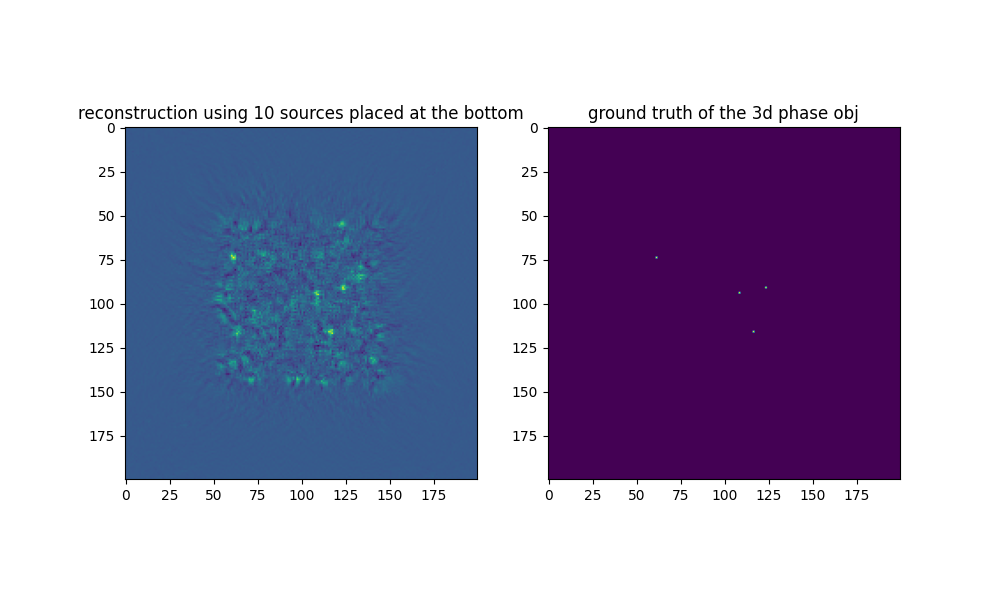

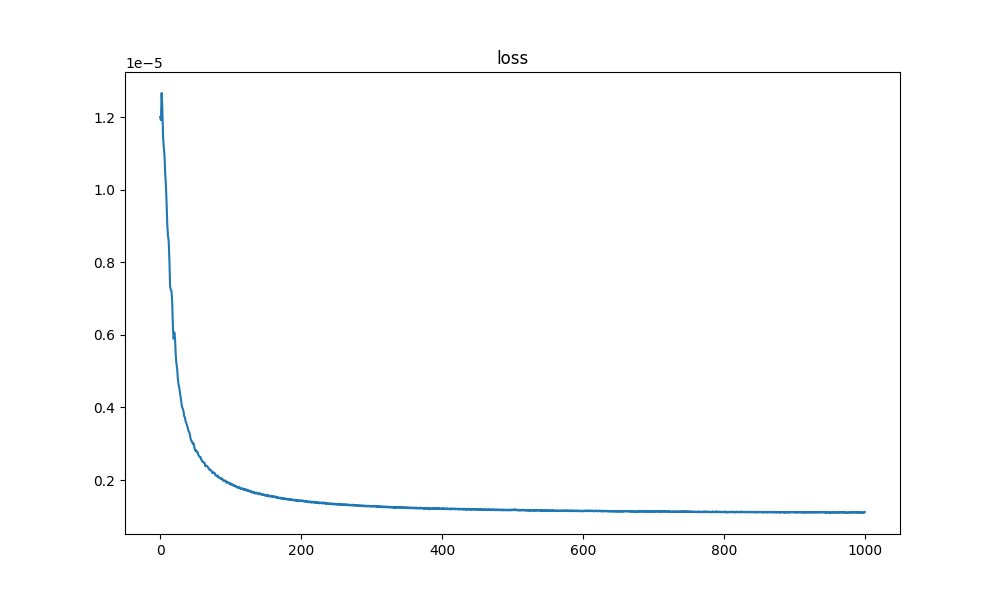

In [3]:
output = np.load('Data/0227/output_1000epoch_mse_tv_1e-1.npy')
# 10: 'Data/0227/output_1000epoch_mse_tv_1e-1.npy'
# 50: 'Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy'

# Show forward
f, axes = plt.subplots(1, 2, figsize=(10, 6))
frames = []

def init():
    frames.append(axes[0].imshow(output[:,:,0]))
    frames.append(axes[1].imshow(gt[:,:,0]))
    axes[0].set_title('reconstruction using 10 sources placed at the bottom')
    axes[1].set_title('ground truth of the 3d phase obj')

init()

def updateFrames(i):
    frames[0].set_data(output[:, :, i])
    frames[1].set_data(gt[:,:,i])


interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))

psnr = peak_signal_noise_ratio(torch.from_numpy(output), torch.from_numpy(gt))
ssim = structural_similarity_index_measure(torch.from_numpy(output[np.newaxis,:,:,:]), torch.from_numpy(gt[np.newaxis,:,:,:]))
print('PSNR:')
print(psnr)
print('SSIM:')
print(ssim)

loss = np.load('Data/0227/loss_list_1000epoch_mse_tv_1e-1.npy')
f, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.set_title('loss')
plt.plot(loss)

interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

PSNR:
tensor(27.3347)
SSIM:
tensor(0.7221)


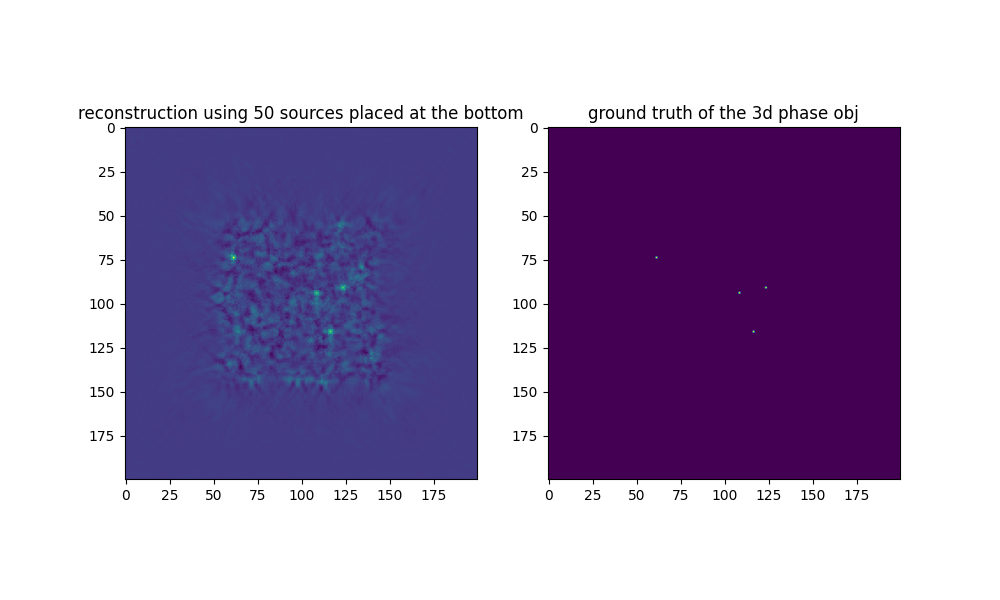

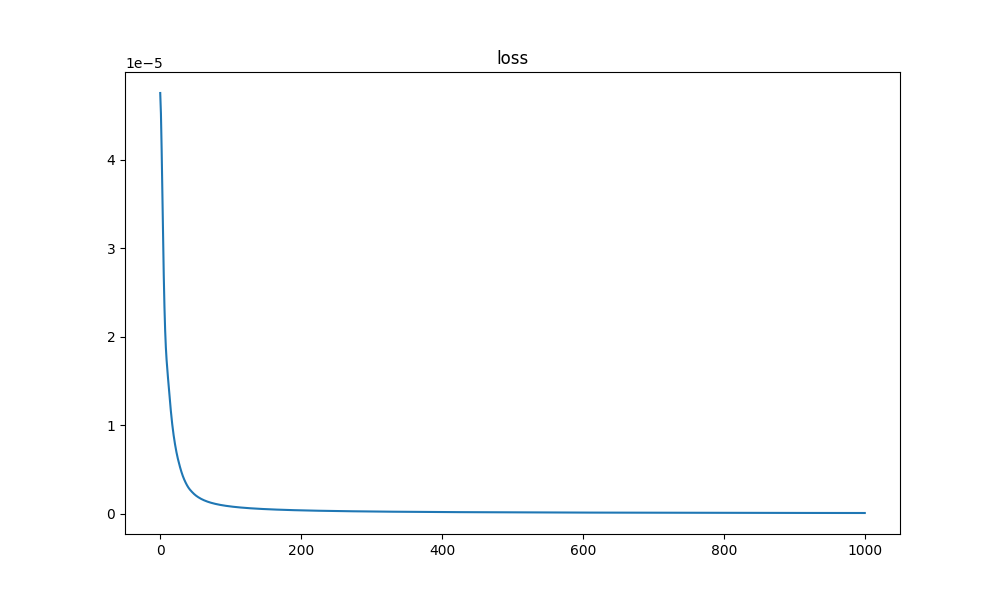

In [31]:
output = np.load('Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')

# Show forward
f, axes = plt.subplots(1, 2, figsize=(10, 6))
frames = []

def init():
    frames.append(axes[0].imshow(output[:,:,0]))
    frames.append(axes[1].imshow(gt[:,:,0]))
    axes[0].set_title('reconstruction using 50 sources placed at the bottom')
    axes[1].set_title('ground truth of the 3d phase obj')

init()

def updateFrames(i):
    frames[0].set_data(output[:, :, i])
    frames[1].set_data(gt[:,:,i])

interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))

psnr = peak_signal_noise_ratio(torch.from_numpy(output), torch.from_numpy(gt))
ssim = structural_similarity_index_measure(torch.from_numpy(output[np.newaxis,:,:,:]), torch.from_numpy(gt[np.newaxis,:,:,:]))
print('PSNR:')
print(psnr)
print('SSIM:')
print(ssim)

loss = np.load('Data/0227/loss_list_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')
f, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.set_title('loss')
plt.plot(loss)

interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.updateFrames(i)>

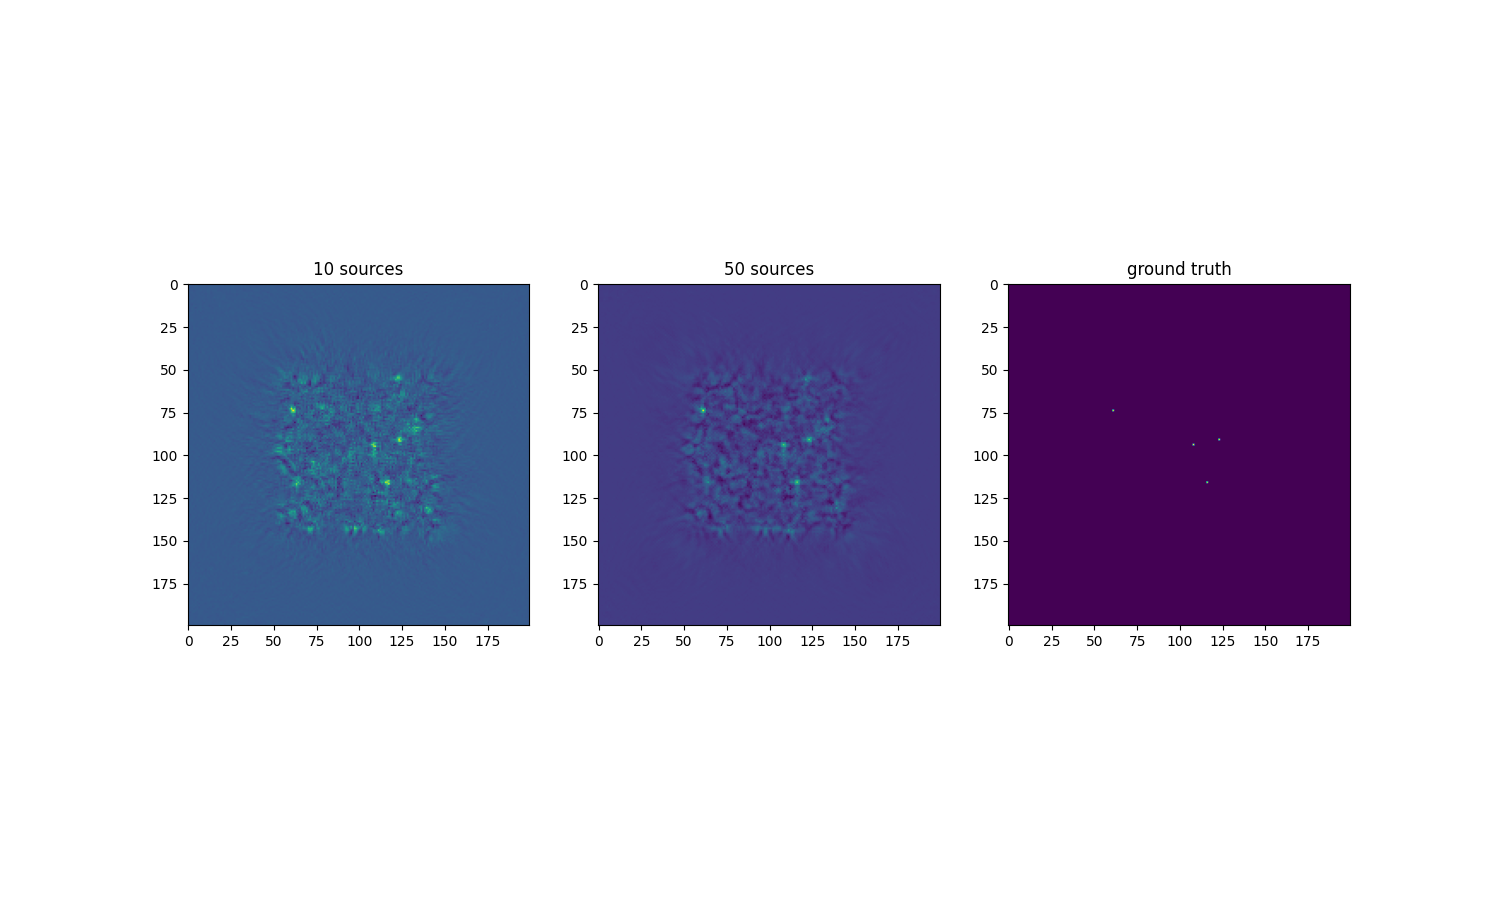

In [32]:
output_10 = np.load('Data/0227/output_1000epoch_mse_tv_1e-1.npy')
output_50 = np.load('Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')
# Comparison between numbers
f, axes = plt.subplots(1, 3, figsize=(15, 9))
frames = []

def init():
    frames.append(axes[0].imshow(output_10[:,:,0]))
    frames.append(axes[1].imshow(output_50[:,:,0]))
    frames.append(axes[2].imshow(gt[:,:,0]))
    axes[0].set_title('10 sources')
    axes[1].set_title('50 sources')
    axes[2].set_title('ground truth')

init()

def updateFrames(i):
    frames[0].set_data(output_10[:, :, i])
    frames[1].set_data(output_50[:,:,i])
    frames[2].set_data(gt[:,:,i])

interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))